DAY 1
Paso 1: Definición del problema
Antes de comenzar a analizar el conjunto de datos, debemos definir el problema o desafío que estamos intentando resolver con esta información

En este caso, trabajaremos con un conjunto de datos del airbn, y nuestro objetivo será poder entrenar un modelo de Machine Learning para responder a la pregunta:

"¿a que se debe el precio de la estadia de un inmueble?".

Paso 2: Recopilación de datos

Importamos los datos y creamos el DataFrame

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/raw/internal-link.csv")
df.head(15)

df["name"].unique()
repeticiones = df['name'].value_counts()
repeticiones = repeticiones[repeticiones > 1]
print()
df[df["name"]=="Hillside Hotel"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


Paso 3: Análisis Descriptivo
Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital. Para ello necesitamos el atributo shape para obtener las dimensiones del objeto y la función info() para conocer la tipología y la cantidad de valores no nulos. Otros muy utilizados son el atributo dtypes, las funciones nunique(), describe(), entre otras

In [122]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [123]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Observaciones:
Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:

Existen un total de 48895 filas (en este caso, registros de alojamientos) y 16 columnas, entre las cuales encontramos el target o clase a predecir, Price.
La variable last_review tiene al menos 1000 valores nulos lo que representa mas de un 20% de los registros.
La variable reviews_per_month tambien cuenta con valores nulos, cuenta de igual forma con los missmos valores que la variable anterior.
El resto de variables cuentan siempre con valor.
Los datos cuentan con 10 características numéricas y 6 características categóricas.

Paso 4: Limpieza de Datos
Limpieza de datos: Eliminar duplicados
Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial debido a que, de dejarlos, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos. Además, tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable Id, ya que podría estar mal generada.

In [125]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [126]:
df.drop("id", axis=1).duplicated().sum()

np.int64(0)

Observaciones
En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de drop_duplicates().

In [127]:
df = df.drop_duplicates(subset=df.columns.difference(['id']))
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Limpieza de datos: Eliminar información irrelevante
Cuando queremos preparar los datos para entrenar un modelo predictivo debemos responder a la siguiente pregunta:

¿Son todas las características imprescindibles para realizar una predicción?
Normalmente, esa pregunta es un rotundo no. Tenemos que ser objetivos y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que estamos seguros de que el algoritmo no va a utilizarlas en el proceso predictivo,

Conclusión:
Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:

id, name, host_id, host_name, last_review	reviews_per_month, calculated_host_listings_count.

In [128]:
df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month", "number_of_reviews", "calculated_host_listings_count"], axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,2


Paso 5: Análisis de Variables

Análisis de Variables Univariante
Una variable univariante es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.+

Una variable categórica es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc., pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores.

En este caso, las variables categóricas son: neighbourhood_group, neighbourhood, room_type:

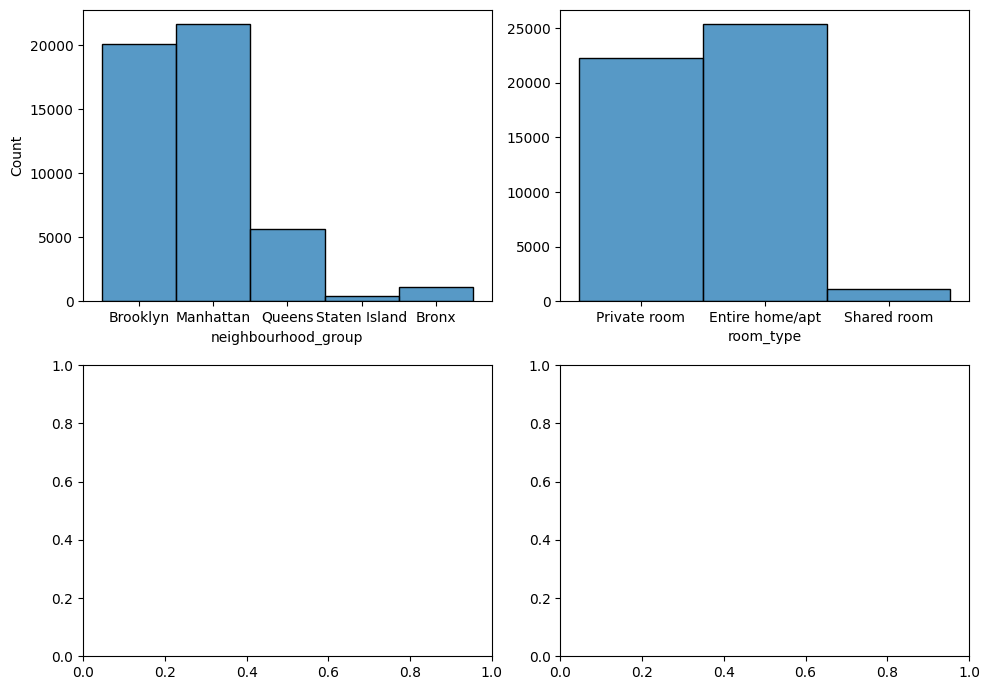

In [129]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(ax=axis[0, 1], data=df, x="room_type").set(ylabel=None)
sns.histplot(ax=axis[0, 0], data=df, x="neighbourhood_group")


plt.tight_layout()
plt.show()

Observaciones
Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza además para comprender la frecuencia de los datos. Al observar un histograma, podemos entender si los datos están sesgados hacia un extremo, si son simétricos, si tienen muchos valores atípicos, etcétera. Con la representación de cada variable podemos determinar que:

price: la mayoria de los precios se encuentran entre 0  y 300 dolares.
room_type: el tipo de habitaciones private room y Entire home/apt tienen casi la totalidad de los regitros mientras que Share room posee a lo sumo unos 1000 registros de la totalidad
neighbourhood_group:Los datos de los registros se encuentran en su mayoria en Brooklyn y Manhattan, en segundo lugar se encuentra queens y con menos registros Staten Island y bronx


Análisis de Variables Univariante Numéricas

Una variable numérica es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito. Una variable categórica numérica puede ser también una variable numérica (por ejemplo, para los sucesivos análisis, podemos tomar el target Survived como numérica también para estudiar relaciones). Normalmente, se representan utilizando un histograma y otro de caja, expuestos juntos. Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son price, minimum_nights,	availability_365, latitude,	longitude. Sin embargo, estas dos última carece de sentido, así que graficaremos las dos primeras:

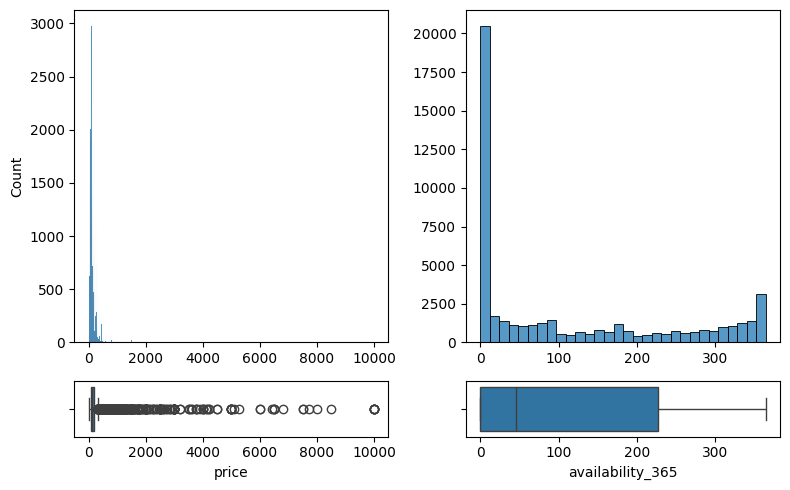

In [131]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="availability_365").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="availability_365")

plt.tight_layout()
plt.show()